<a href="https://colab.research.google.com/github/VARSHAG16/BHARAT_INTERN_HandwrittenNumberRecognition/blob/main/MNISTnumberclassification_VARSHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


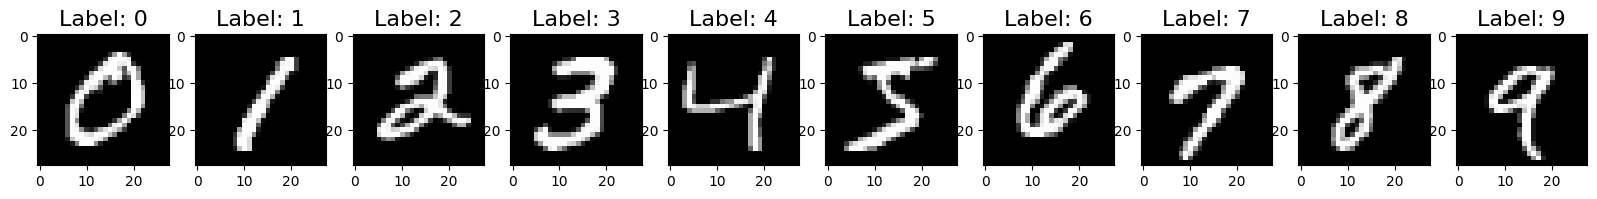

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
for i in range(10):
  print(y_train[i])
  

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
  print(y_train[i])
     

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
     

In [9]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)
     

(60000, 784)


In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 13ms/step - loss: 0.5905 - accuracy: 0.8313
Epoch 2/10
118/118 [==============================] - 2s 15ms/step - loss: 0.2233 - accuracy: 0.9344
Epoch 3/10
118/118 [==============================] - 2s 20ms/step - loss: 0.1665 - accuracy: 0.9514
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1307 - accuracy: 0.9619
Epoch 5/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1081 - accuracy: 0.9680
Epoch 6/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0936 - accuracy: 0.9717
Epoch 7/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 8/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 9/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0600 - accuracy: 0.9821
Epoch 10/10
118/118 [==============================] - 2s 16ms/step - loss: 0.0538 - accura

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
     

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9765
Test Loss: 0.07374615222215652, Test Accuracy: 0.9764999747276306


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.94305343e-07 9.54517745e-08 4.23707970e-05 ... 9.99913752e-01
  1.06288134e-07 6.47545903e-06]
 [4.60376441e-07 3.88120709e-04 9.99586642e-01 ... 1.29256279e-07
  2.33512333e-06 2.84374357e-10]
 [5.16479258e-06 9.96471286e-01 4.79834649e-04 ... 2.02493789e-03
  3.25045199e-04 1.07416881e-05]
 ...
 [1.50970625e-10 9.46068668e-10 1.55189431e-10 ... 2.89765211e-07
  3.86538773e-07 1.50017081e-06]
 [2.30274139e-07 4.69888022e-08 4.55295995e-10 ... 7.52166500e-07
  4.71719977e-04 3.27187415e-08]
 [4.55537865e-08 1.63902832e-11 1.89405824e-09 ... 5.26931406e-12
  8.19011470e-10 7.43520523e-12]]
[7 2 1 ... 4 5 6]


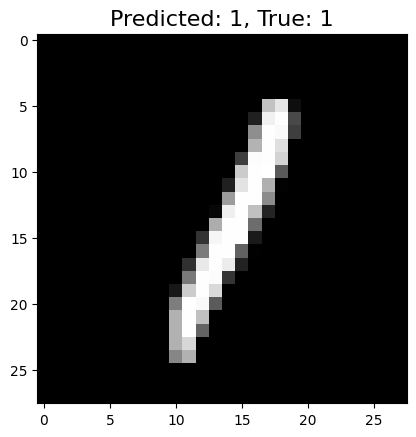

In [15]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
     

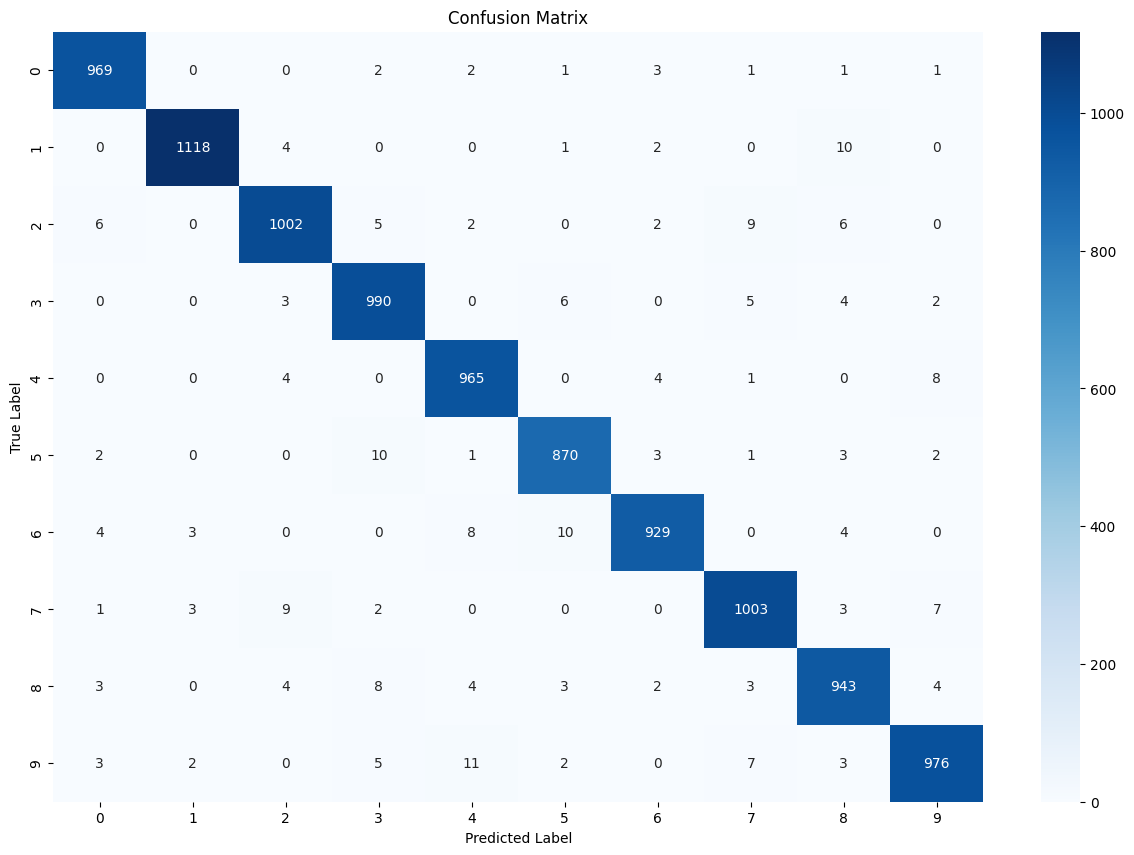

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [17]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]
     

In [18]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

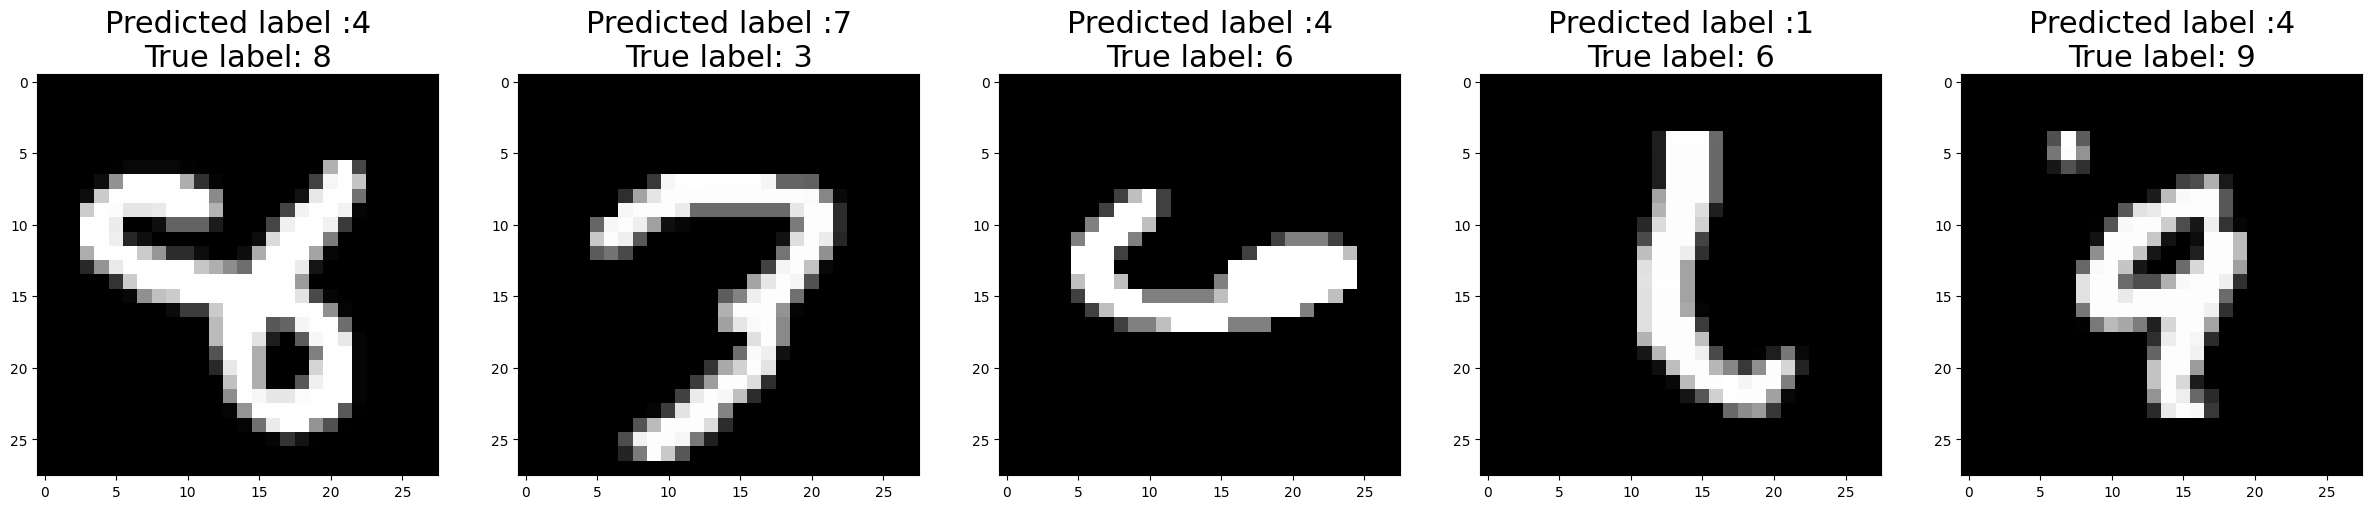

In [19]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
     